In [1]:
import logging
#Logging is a means of tracking events that happen when some software runs
# Create and configure logger
logging.basicConfig(filename="../logs/newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
 
# Creating an object
logger = logging.getLogger()
 
# Setting the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)
 
# Test messages
logger.debug("Harmless debug Message")
logger.info("Just an information")
logger.warning("Its a Warning")
logger.error("Did you try to divide by zero")
logger.critical("Internet is down")

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set_style("darkgrid")
%matplotlib inline
import sys
sys.path.insert(0,'../scripts/')


In [3]:
from data_loader import load_df_from_csv
from data_struct import DataInfo
from cleaner import DataCleaner

In [4]:

train = load_df_from_csv("../data/clean_train.csv")
test = load_df_from_csv("../data/clean_test.csv")


In [5]:
train.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,3,2013-01-02,5530,668,1,0,0,1,...,8.278443,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,1,4,2013-01-03,4327,578,1,0,0,1,...,7.486159,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,2,1,5,2013-01-04,4486,619,1,0,0,1,...,7.247173,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,3,1,6,2013-01-05,4997,635,1,0,0,1,...,7.869291,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,4,1,1,2013-01-07,7176,785,1,1,0,1,...,9.141401,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [6]:
test.head()

,Unnamed: 0,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Day,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,40233,1,6,2015-08-01,1.0,0,0,1,1,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,39377,1,7,2015-08-02,0.0,0,0,1,2,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,2,38521,1,1,2015-08-03,1.0,1,0,1,3,...,32,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,3,37665,1,2,2015-08-04,1.0,1,0,1,4,...,32,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,4,36809,1,3,2015-08-05,1.0,1,0,1,5,...,32,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [7]:
explorer = DataInfo(train)

In [8]:
explorer.get_basic_description()

The DataFrame containes 844338 rows and 25 columns.
Current DataFrame Memory Usage:
297272033
Current DataFrame Memory Usage of columns is :
DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 844338 non-null  uint32 
 1   Store                      844338 non-null  uint16 
 2   DayOfWeek                  844338 non-null  uint8  
 3   Date                       844338 non-null  object 
 4   Sales                      844338 non-null  uint16 
 5   Customers                  844338 non-null  uint16 
 6   Open                       844338 non-null  uint8  
 7   Promo                      844338 non-null  uint8  
 8   StateHoliday               844338 non-null  object 
 9   SchoolHoliday              844338 non-null  uint8  
 10  Day                        844338 n

In [9]:
explorer.get_columns()

Columns Listed in the DataFrame are: 


['Unnamed: 0',
 'Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Day',
 'Month',
 'Year',
 'DayOfYear',
 'WeekOfYear',
 'SalePerCustomer',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [10]:
explorer.get_dispersion_params()

c:\Users\daisy.khaabi\Desktop\10-Acad\pharm_sales\notebooks\../scripts\data_struct.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return self.df.describe().append(self.get_mode()).append(self.get_median()).dropna(1)
c:\Users\daisy.khaabi\Desktop\10-Acad\pharm_sales\notebooks\../scripts\data_struct.py:191: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = self.df.median()
c:\Users\daisy.khaabi\Desktop\10-Acad\pharm_sales\notebooks\../scripts\data_struct.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return self.df.describe().append(self.get_mode()).append(self.get

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,SalePerCustomer,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,422168.500000,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,15.835706,5.845774,2013.831945,162.387649,23.646946,9.493640,5450.044922,4.926482,1369.692627,0.498670,11.596159,1003.201050
std,243739.530131,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,8.683392,3.323959,0.777271,101.368955,14.389931,2.197448,7801.082031,4.283634,935.556458,0.499999,15.308101,1005.874695
min,0.000000,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,1.000000,1.000000,2013.000000,1.000000,1.000000,2.749075,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,211084.250000,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,8.000000,3.000000,2013.000000,75.000000,11.000000,7.895571,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,422168.500000,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,16.000000,6.000000,2014.000000,154.000000,23.000000,9.250000,2325.000000,4.000000,2006.000000,0.000000,0.000000,0.000000
75%,633252.750000,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,23.000000,8.000000,2014.000000,241.000000,35.000000,10.899729,6880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,844337.000000,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,31.000000,12.000000,2015.000000,365.000000,52.000000,64.957855,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000
Mode,0.000000,85.000000,6.000000,5674.000000,560.000000,1.0,0.000000,0.000000,11.000000,1.000000,2013.000000,2.000000,26.000000,9.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Median,422168.500000,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,16.000000,6.000000,2014.000000,154.000000,23.000000,9.250000,2325.000000,4.000000,2006.000000,0.000000,0.000000,0.000000


In [11]:
explorer.get_column_dispersion_params('Sales')

c:\Users\daisy.khaabi\Desktop\10-Acad\pharm_sales\notebooks\../scripts\data_struct.py:150: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return self.df.describe().append(self.get_mode()).append(self.get_median()).dropna(1)[col]
c:\Users\daisy.khaabi\Desktop\10-Acad\pharm_sales\notebooks\../scripts\data_struct.py:191: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = self.df.median()
c:\Users\daisy.khaabi\Desktop\10-Acad\pharm_sales\notebooks\../scripts\data_struct.py:150: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return self.df.describe().append(self.get_mode()).append(sel

count     844338.000000
mean        6955.959134
std         3103.815515
min           46.000000
25%         4859.000000
50%         6369.000000
75%         8360.000000
max        41551.000000
Mode        5674.000000
Median      6369.000000
Name: Sales, dtype: float64

In [12]:
explorer = DataInfo(test)

In [13]:
explorer.get_basic_description()

The DataFrame containes 41088 rows and 23 columns.
Current DataFrame Memory Usage:
14308400
Current DataFrame Memory Usage of columns is :
DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 41088 non-null  uint16 
 1   Id                         41088 non-null  uint16 
 2   Store                      41088 non-null  uint16 
 3   DayOfWeek                  41088 non-null  uint8  
 4   Date                       41088 non-null  object 
 5   Open                       41077 non-null  float32
 6   Promo                      41088 non-null  uint8  
 7   StateHoliday               41088 non-null  object 
 8   SchoolHoliday              41088 non-null  uint8  
 9   Day                        41088 non-null  uint8  
 10  Month                      41088 non-null  uint8  


In [14]:
explorer.get_dispersion_params()

c:\Users\daisy.khaabi\Desktop\10-Acad\pharm_sales\notebooks\../scripts\data_struct.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return self.df.describe().append(self.get_mode()).append(self.get_median()).dropna(1)
c:\Users\daisy.khaabi\Desktop\10-Acad\pharm_sales\notebooks\../scripts\data_struct.py:191: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = self.df.median()
c:\Users\daisy.khaabi\Desktop\10-Acad\pharm_sales\notebooks\../scripts\data_struct.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return self.df.describe().append(self.get_mode()).append(self.get

,Unnamed: 0,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,Month,Year,DayOfYear,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.0,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20543.500000,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,13.520833,8.354167,2015.0,236.500000,34.645833,5082.125977,4.429906,1264.787354,0.580607,14.182243,1168.078247
std,11861.228267,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,8.448450,0.478266,0.0,13.853568,2.015481,7218.274902,4.214484,969.984741,0.493466,16.177933,992.765381
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,8.000000,2015.0,213.000000,31.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10271.750000,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,6.750000,8.000000,2015.0,224.750000,33.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20543.500000,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,12.500000,8.000000,2015.0,236.500000,35.000000,2410.000000,4.000000,2005.000000,1.000000,9.000000,2010.000000
75%,30815.250000,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,19.250000,9.000000,2015.0,248.250000,36.000000,6435.000000,9.000000,2011.000000,1.000000,31.000000,2012.000000
max,41087.000000,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,31.000000,9.000000,2015.0,260.000000,38.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000
Mode,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,8.000000,2015.0,213.000000,32.000000,190.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Median,20543.500000,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,12.500000,8.000000,2015.0,236.500000,35.000000,2410.000000,4.000000,2005.000000,1.000000,9.000000,2010.000000


1.Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def plot_hist(df: pd.DataFrame, column: str, color: str) -> None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


def plot_count(df: pd.DataFrame, column: str) -> None:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str,) -> None:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [28]:
test.Promo.value_counts()

0    24824
1    16264
Name: Promo, dtype: int64

In [29]:
test.Promo.value_counts(normalize = True)

0    0.604167
1    0.395833
Name: Promo, dtype: float64

More than 60% of the stores are not running promos on the select time.

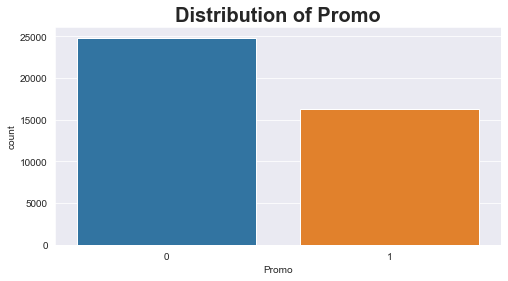

In [30]:
plot_count(test,'Promo')

In [31]:
train.Promo.value_counts()

0    467463
1    376875
Name: Promo, dtype: int64

In [32]:
train.Promo.value_counts(normalize=True)

0    0.553644
1    0.446356
Name: Promo, dtype: float64

55 percent of the stores are not running promos .

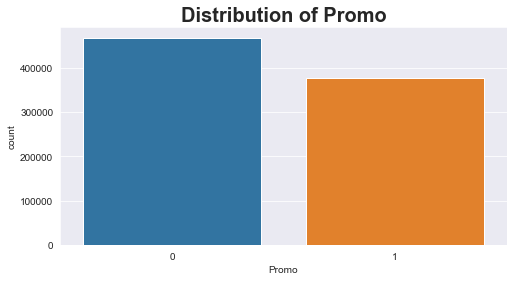

In [33]:
plot_count(train,'Promo')

C:\Users\kachase\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


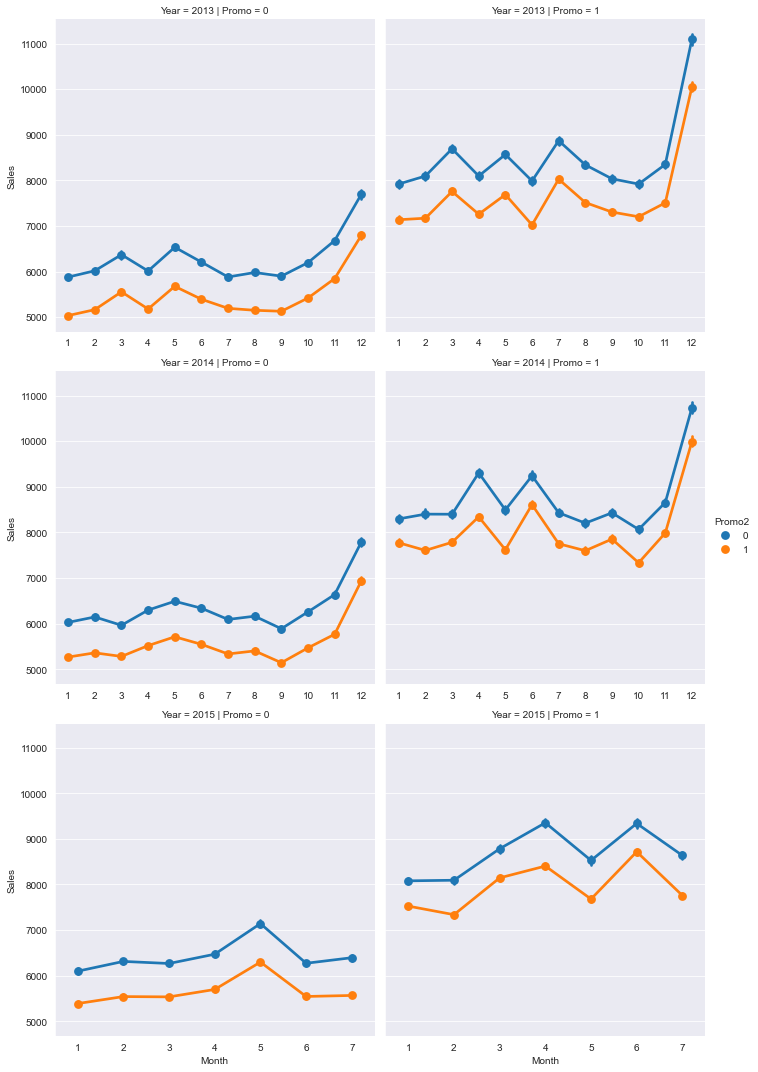

In [34]:
sns.factorplot(data = train, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

<AxesSubplot:>

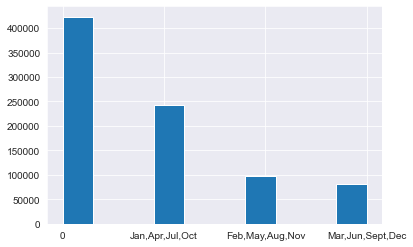

In [77]:
train['PromoInterval'].hist()

Jan,Apr.July ,Oct is the most prefeered interval

Sales are typically higher when there are sales,When there are no sales there seems to be a general peak around month 4 and 5,and around months 9 to 12.

## 2.Check & compare sales behavior before, during and after holidays

In [35]:
train.SchoolHoliday.value_counts()

0    680893
1    163445
Name: SchoolHoliday, dtype: int64

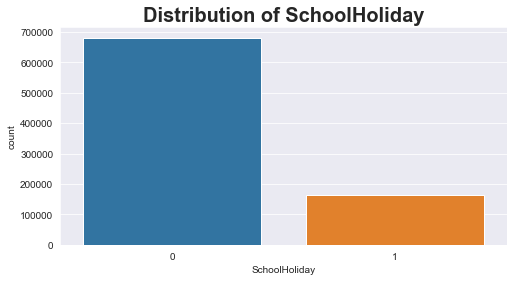

In [36]:
plot_count(train,'SchoolHoliday')

In [37]:
train.StateHoliday.value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

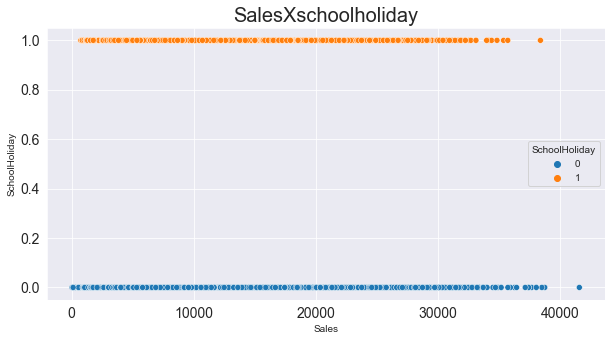

In [38]:
plot_scatter(train ,"Sales", "SchoolHoliday","SalesXschoolholiday","SchoolHoliday")

C:\Users\kachase\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


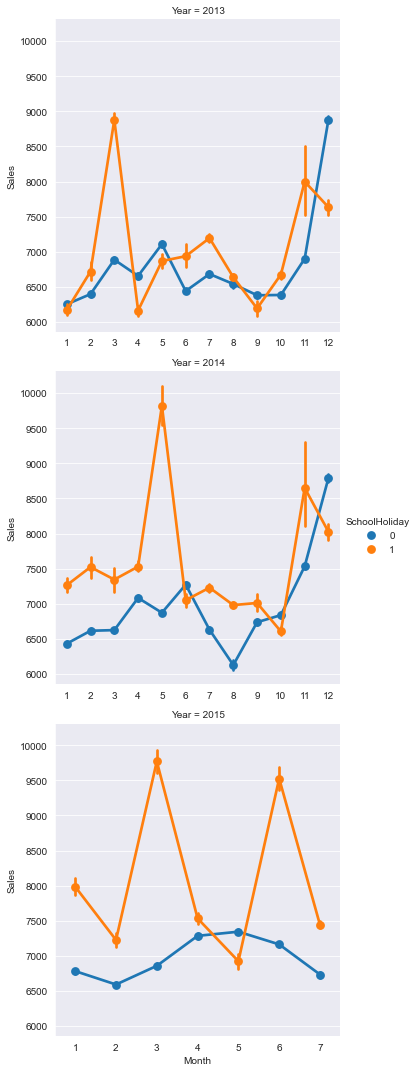

In [39]:
sns.factorplot(data = train, x ="Month", y = "Sales",hue="SchoolHoliday",
               
               row = "Year"
              ,sharex=False)

Sales certainly peak during school holidays.We can identify Feb to April and last qurater of the year onto the Chritsmas holidays.This peaks coincide with Holiday sales.

C:\Users\kachase\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


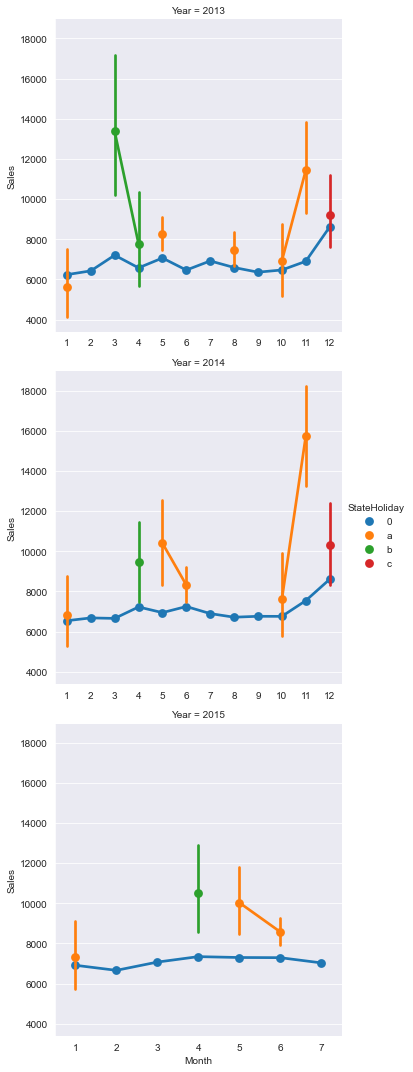

In [40]:
sns.factorplot(data = train, x ="Month", y = "Sales",hue="StateHoliday",
               
               row = "Year"
              ,sharex=False)

Similarly states peak during state holidays as well.All stores remain open during StateHolidays

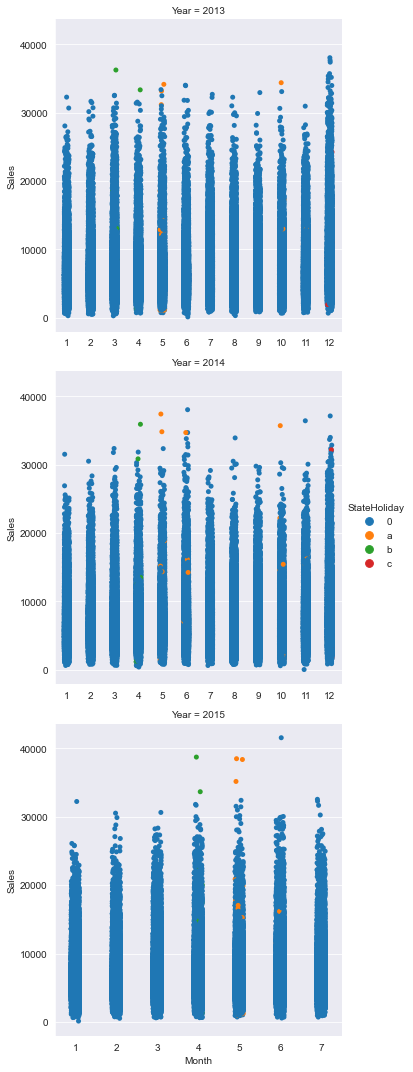

In [64]:
sns.catplot(data = train, x ="Month", y = "Sales",hue="StateHoliday",
               
               row = "Year"
              ,sharex=False)

In [41]:

print (" Stores closed on state holidays:{}" .format(train[(train.Open == 0) & (train.StateHoliday != 0)]['Store'].count()))


 Stores closed on state holidays:0


## 3.Find out any seasonal (Christmas, Easter etc) purchase behaviours,

C:\Users\kachase\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kachase\Anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


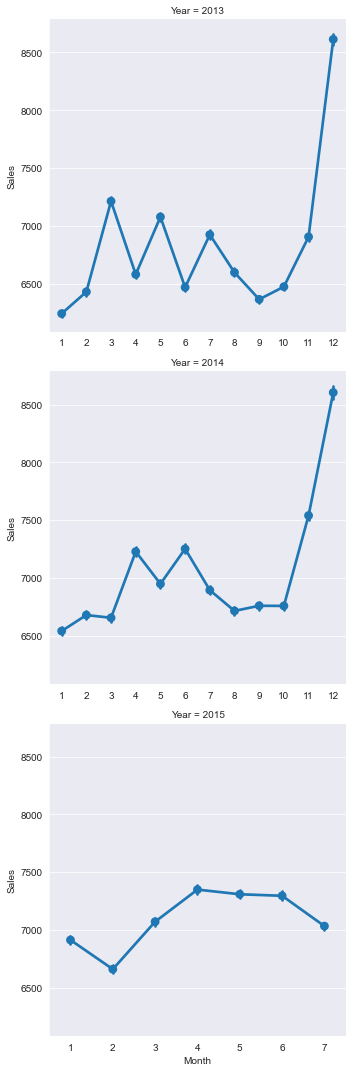

In [42]:
sns.factorplot(data = train, x ="Month", y = "Sales",
               row = "Year"
              ,sharex=False)

As we observe above,sales typically peak between months three annd six,this is around Easter season .The second peak is from months 10 onwards,an indicator of Christma sales.

[]

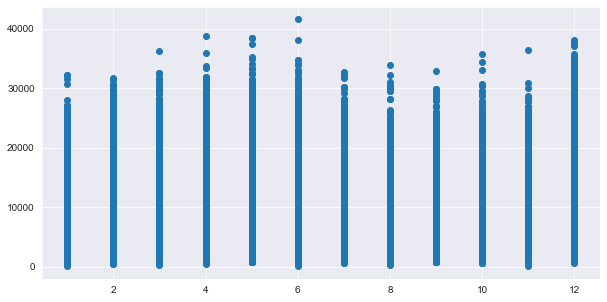

In [76]:
plt.figure(figsize=(10,5))
plt.scatter(train["Month"],train["Sales"])
plt.plot()

### 4.What can you say about the correlation between sales and number of customers?

In [43]:
from scipy import stats
round(stats.pearsonr(train.Customers, train.Sales)[0],2)

0.82

There is a high corelation between the number of customers and the amount os sales.This is intuitive since the more the cutomers in ,the more the sales

In [44]:
from pandas.plotting import scatter_matrix

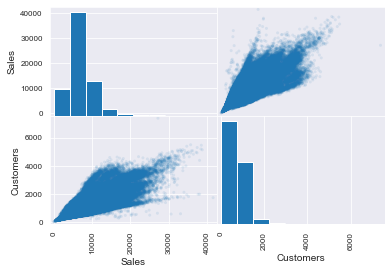

In [45]:
#Sales_CompetitionDistance
attributes = ["Sales", "Customers"]
scatter_matrix(train[attributes], alpha=0.1);

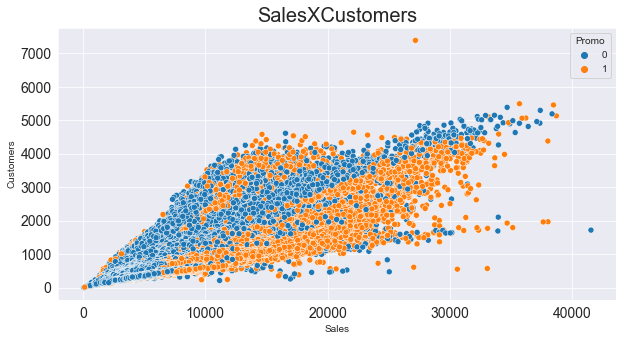

In [46]:
plot_scatter(train ,"Sales", "Customers","SalesXCustomers","Promo")

## 5.How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [47]:
from scipy import stats
round(stats.pearsonr(train.Customers, train.Promo)[0],2)

0.18

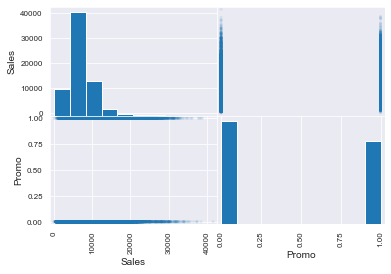

In [48]:
#Sales_CompetitionDistance
attributes = ["Sales", "Promo"]
scatter_matrix(train[attributes], alpha=0.1);

There seems to be a low corellation between the number of customers and the promos offered.Let us visualize this.

C:\Users\kachase\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


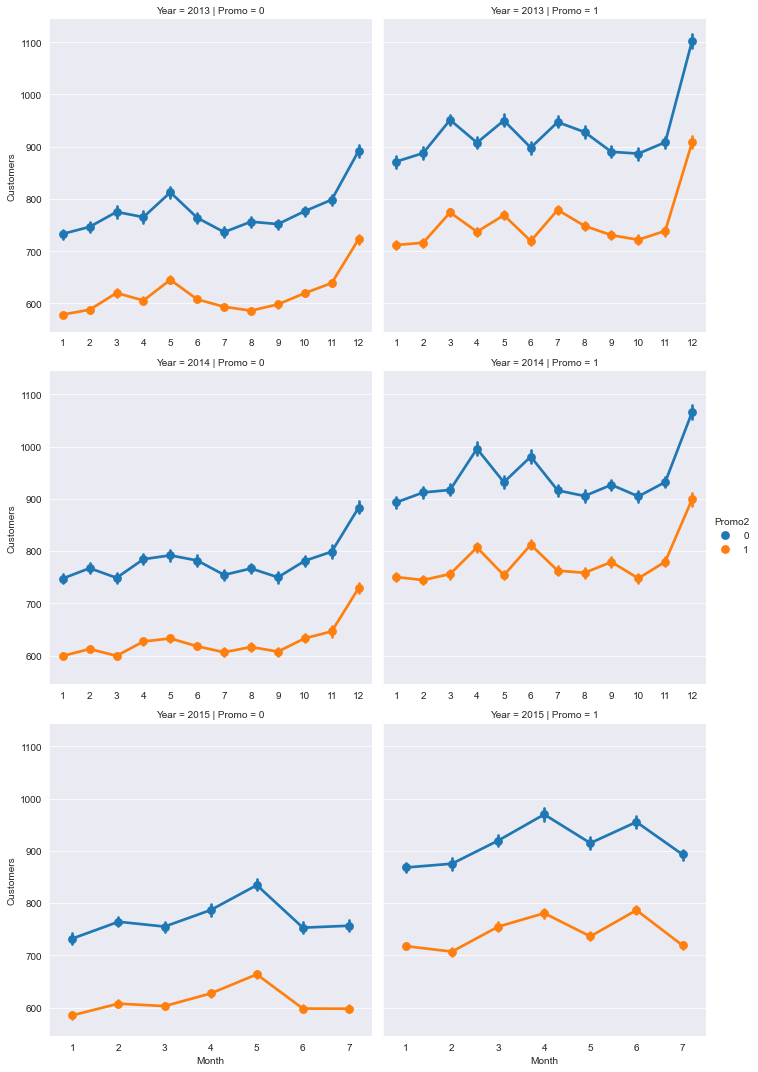

In [49]:
sns.factorplot(data = train, x ="Month", y = "Customers", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

There is definitely a surge in customers when there are promos running.Customer patterns remain quite similar with or without promos.

## 6.Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

Promos should translate to significant margins in sales and customer influx.Thi is not the case.We see that Sunday experiences more customers actually without the need to have Promotions running.


In [50]:
train.Store.nunique()

1115

In [51]:
#33 Stores are opened on Sundays
print (" Stores that have have promos:{}" .format(train[(train.Open == 1) & (train.DayOfWeek != 7)& (train.Promo == 1)]['Store'].unique().shape[0]))


 Stores that have have promos:1115


## 7.Trends of customer behavior during store open and closing times

C:\Users\kachase\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


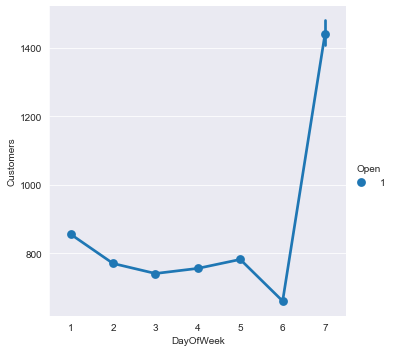

In [52]:
sns.factorplot(data = train, x ="DayOfWeek", y = "Customers", 
        
               hue = 'Open',sharex=False)

In [53]:
#33 Stores are opened on Sundays
print (" Stores that are closed:{}" .format(train[(train.Open != 1)]['Store'].unique().shape[0]))


 Stores that are closed:0


## 8.Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [54]:
from scipy import stats
round(stats.pearsonr(train.DayOfWeek, train.Sales)[0],2)

-0.18

In [55]:
#33 Stores are opened on Sundays
print ("Number of Stores opened on Sundays:{}" .format(train[(train.Open == 1) & (train.DayOfWeek == 7)]['Store'].unique().shape[0]))


Number of Stores opened on Sundays:33


In [56]:
#33 Stores are opened on Sundays
print ("Number of Stores in the till Friday:{}" .format(train[(train.Open == 1) & (train.DayOfWeek != 6)&(train.DayOfWeek != 7)]['Store'].unique().shape[0]))


Number of Stores in the till Friday:1115


In [57]:
#33 Stores are opened on Sundays
print (" Stores opened on Sundays:{}" .format(train[(train.Open == 1) & (train.DayOfWeek == 7)]['Store'].unique()))


 Stores opened on Sundays:[  85  122  209  259  262  274  299  310  335  353  423  433  453  494
  512  524  530  562  578  676  682  732  733  769  863  867  877  931
  948 1045 1081 1097 1099]


In [58]:
#33 Stores are opened on Sundays
print (" Stores opened on Saturday:{}" .format(train[(train.Open == 1) & (train.DayOfWeek == 6)]['Store'].unique().shape[0]))


 Stores opened on Saturday:1115


The stores that are open during the week are open on Saturday as well.Only 33 stores open on Sunday.

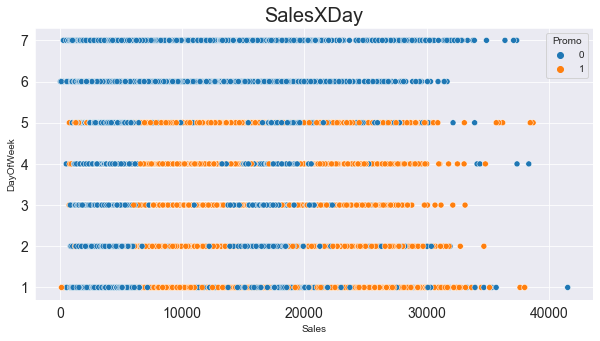

In [59]:
plot_scatter(train ,"Sales", "DayOfWeek","SalesXDay","Promo")

C:\Users\kachase\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


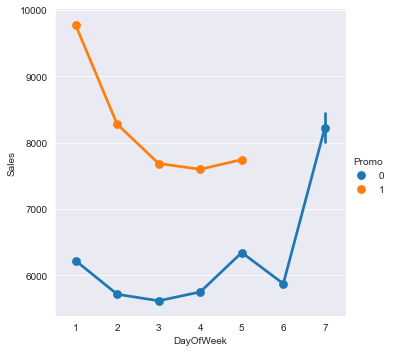

In [60]:
sns.factorplot(data = train, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

We see that there are no promos on Sundays.Sales peak on Monday due to the promos probably and the rush to start the week probably.They steadily decline and peak slightly on Friday perhaps due to the weekend and there is a sharp increase on Sunday again,this is despite the lack of promos.This might be because there are only 33 stores open during the weekend.

## 9.Check how the assortment type affects sales

In [61]:
import itertools   

In [62]:
train['SalePerCustomer'] = train['Sales']/train['Customers']


AttributeError: 'DataFrameGroupBy' object has no attribute 'SalesperCustomer'

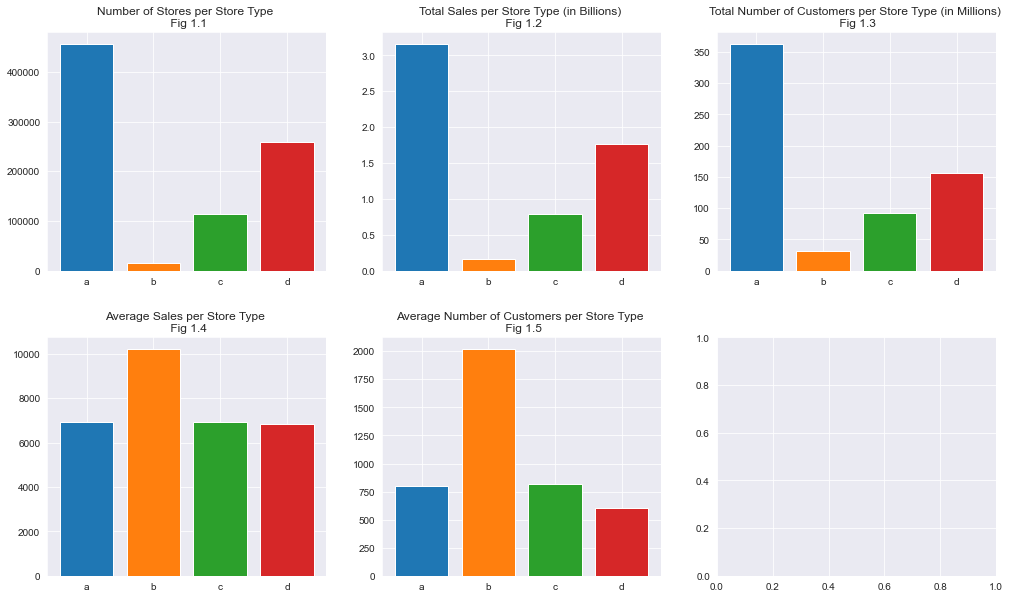

In [63]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(train.groupby(by="StoreType").count().Store.index,train.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(train.groupby(by="StoreType").sum().Sales.index,train.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(train.groupby(by="StoreType").sum().Customers.index,train.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(train.groupby(by="StoreType").sum().Customers.index,train.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(train.groupby(by="StoreType").sum().Customers.index,train.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(train.groupby(by="StoreType").sum().Sales.index,train.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers. One assumption could be that if B has only 17 stores but such a high amount of average sales and customers that it is likely hyper Rossman branches whereas A would be smaller in size but much more present.

Surprisingly it is StoreType D who has the highest average spending per Customer, this is probably explained by an average competition distance higher than ther rest which means each customer will buy more since he knows there isn't a lot of similair shops around.

What would help us understand better what's happening is to look for other variables explaining this behaviour like Assortments, Comeptition and Promotions

## Assortment

As we cited in the description, assortments have three types and each store has a defined type and assortment type:

a means basic things

b means extra things

c means extended things so the highest variety of products.

What could be interesting is to see the relationship between a store type and its respective assortment type

StoreType  Assortment
a          a             286028
           c             171014
b          a               6409
           b               8209
           c                942
c          a              58554
           c              54414
d          a              93884
           c             164884
Name: Assortment, dtype: int64

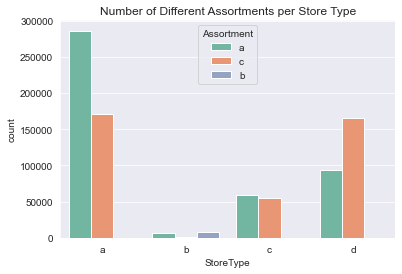

In [65]:
StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=train,palette=sns.color_palette("Set2", n_colors=3)).set_title("Number of Different Assortments per Store Type")
train.groupby(by=["StoreType","Assortment"]).Assortment.count()

We can clearly see here that most of the stores have either a assortment type or c assortment type.
Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.
Another important factor here is the fact that store type b is the only one who has the b assortment type and a lot of them actually which stands for "extra" and by looking at fig 1.4 and 1.5 he's the one who has the highest number of customers and sales. Probably this formula of extra is the right middlepoint for customers between not too much variety like C assortment and not too basic like A assortment and this is what is driving the high traffic in this store.

## 10.How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

Text(0.5, 1.0, 'A piechart indicating mean sales in the 5 competition distance decile classes')

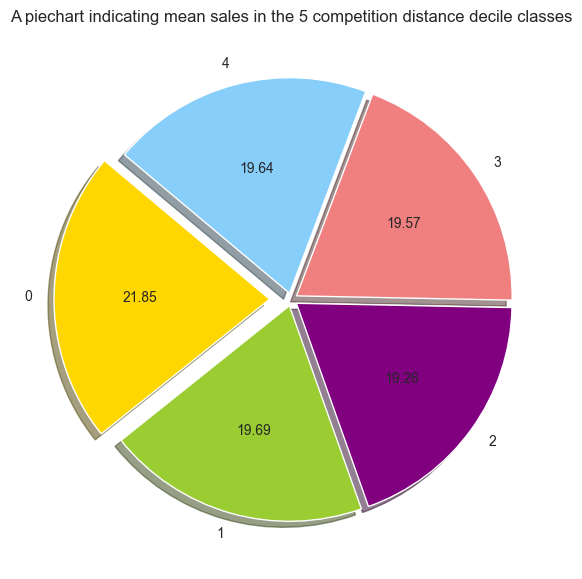

In [17]:
train['Decile_rank'] = pd.qcut(train['CompetitionDistance'], 5, labels = False)
new_df = train[['Decile_rank', 'Sales']]
# a = new_df.groupby('Decile_rank').sum()
a = new_df.groupby('Decile_rank').mean()
labels = a.index.to_list()
sizes = a.Sales.to_list()
fig = plt.figure(figsize =(10, 7))
colors = ['gold', 'yellowgreen', 'purple', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.03, 0.03, 0.03, 0.03)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%.2f', startangle=140)
plt.title('A piechart indicating mean sales in the 5 competition distance decile classes')

Text(0.5, 1.0, 'A piechart indicating mean number of customers in the 5 CompetitioDistance decile classes')

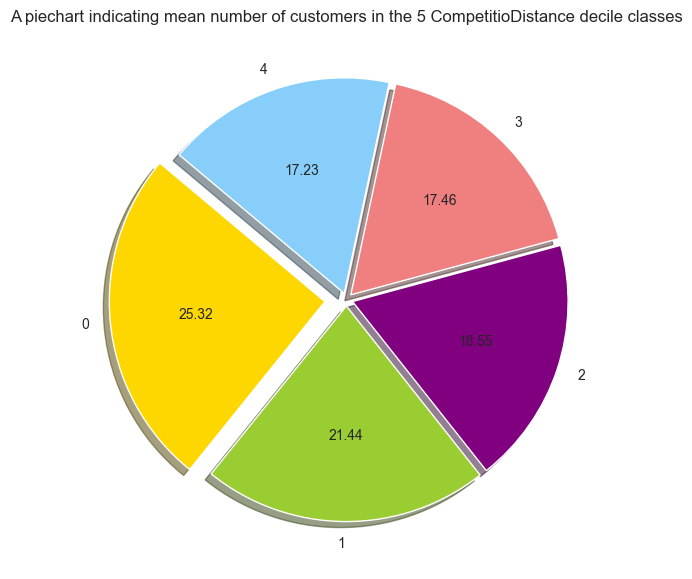

In [18]:
train['Decile_rank'] = pd.qcut(train['CompetitionDistance'], 5, labels = False)
new_df = train[['Decile_rank', 'Customers']]
# a = new_df.groupby('Decile_rank').sum()
a = new_df.groupby('Decile_rank').mean()
labels = a.index.to_list()
sizes = a.Customers.to_list()
fig = plt.figure(figsize =(10, 7))
colors = ['gold', 'yellowgreen', 'purple', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.03, 0.03, 0.03, 0.03)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%.2f', startangle=140)
plt.title('A piechart indicating mean number of customers in the 5 CompetitioDistance decile classes')

C:\Users\daisy.khaabi\AppData\Local\Temp\ipykernel_16288\1645886255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.CompetitionDistance, color = 'violet')


<AxesSubplot: xlabel='CompetitionDistance', ylabel='Density'>

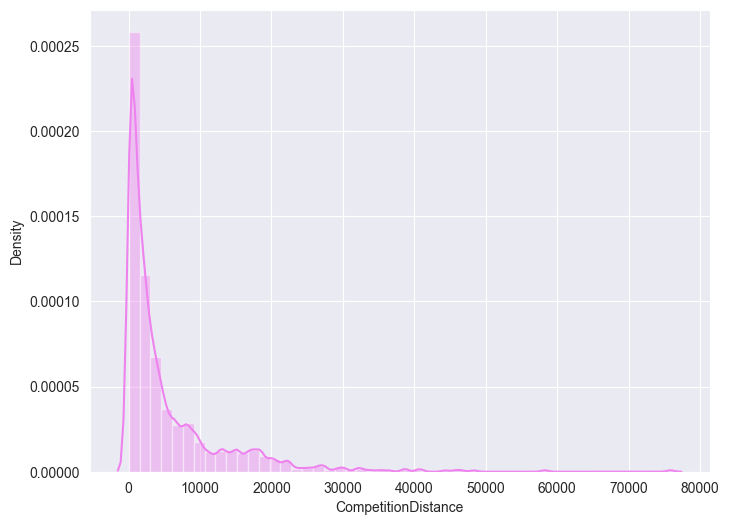

In [20]:
fig = plt.figure(figsize = (8,6))
sns.distplot(train.CompetitionDistance, color = 'violet')

In [66]:
#binning
train['CompetitionDist_Cat']=pd.cut(train['CompetitionDistance'], 5)

In [67]:
train.groupby(by="CompetitionDist_Cat").Sales.mean()

CompetitionDist_Cat
(-55.84, 15188.0]     6957.360876
(15188.0, 30356.0]    7041.604692
(30356.0, 45524.0]    6471.923562
(45524.0, 60692.0]    5980.114445
(60692.0, 75860.0]    7775.446449
Name: Sales, dtype: float64

In [68]:
train.groupby(by="CompetitionDist_Cat").Customers.mean()

CompetitionDist_Cat
(-55.84, 15188.0]     771.345223
(15188.0, 30356.0]    691.574605
(30356.0, 45524.0]    680.101854
(45524.0, 60692.0]    643.988246
(60692.0, 75860.0]    914.574972
Name: Customers, dtype: float64

There is infact a negative corellation.Which makes sense because the closer a store is to it's competiotn the less likely they are to do well in sales .

In [69]:
from pandas.plotting import scatter_matrix

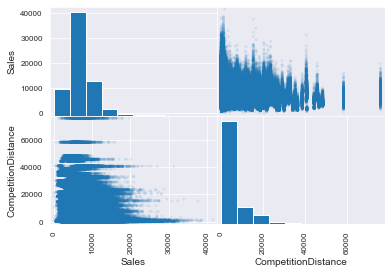

In [70]:
#Sales_CompetitionDistance
attributes = ["Sales", "CompetitionDistance"]
scatter_matrix(train[attributes], alpha=0.1);

Sales are highest when competition distance is low.

Distance only stops being a factor when there are promos.As we see in the Scattre above,the sales only oncreae woth distance when Promos are factored in.

Well, it looks like the further stores distant from each other, the lower sales they get. This maybe due to that people tend to go to places where several same stores setting next to each other in order to get best prices.¶
Also, several similar stores setting to each other may mean that their place is a big market within the city while that distant stores may mean that they are just small retailing stores

# # 11.How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

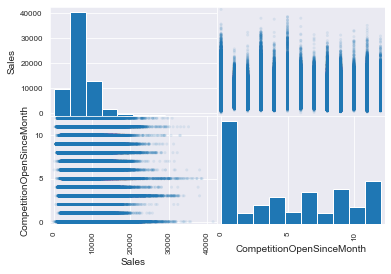

In [71]:
#Sales_CompetitionDistance
attributes = ["Sales", "CompetitionOpenSinceMonth"]
scatter_matrix(train[attributes], alpha=0.1);

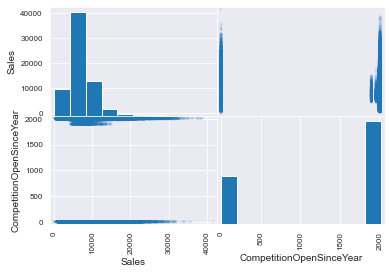

In [72]:
#Sales_CompetitionDistance
attributes = ["Sales", "CompetitionOpenSinceYear"]
scatter_matrix(train[attributes], alpha=0.1);

In [73]:
from scipy import stats
round(stats.pearsonr(train.CompetitionOpenSinceMonth, train.Sales)[0],2)

-0.02

In [74]:
from scipy import stats
round(stats.pearsonr(train.CompetitionOpenSinceYear, train.Sales)[0],2)

0.01

There is a negative corelation between sales and the month the competition was opened.The younger the competition the more likely an existing store is likely to lose its clients to the competitor.This slightly changes over time as we see the in the corellation of 0.01 with year.This is because as time goes by,a customer base solidifies and you can have your clients.

### corellation matrix

In [78]:
corr_matrix = train.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823552
Promo                        0.368199
SalePerCustomer              0.186563
WeekOfYear                   0.074463
Month                        0.073589
DayOfYear                    0.068699
SchoolHoliday                0.038635
Year                         0.036151
Unnamed: 0                   0.007803
Store                        0.007723
CompetitionOpenSinceYear     0.005257
CompetitionOpenSinceMonth   -0.018369
CompetitionDistance         -0.035908
Day                         -0.051865
Promo2SinceWeek             -0.058493
Promo2                      -0.127556
Promo2SinceYear             -0.127581
DayOfWeek                   -0.178753
Open                              NaN
Name: Sales, dtype: float64

Cutomers,promo and SalesPerCustomer are highly corelatted with the sales value.

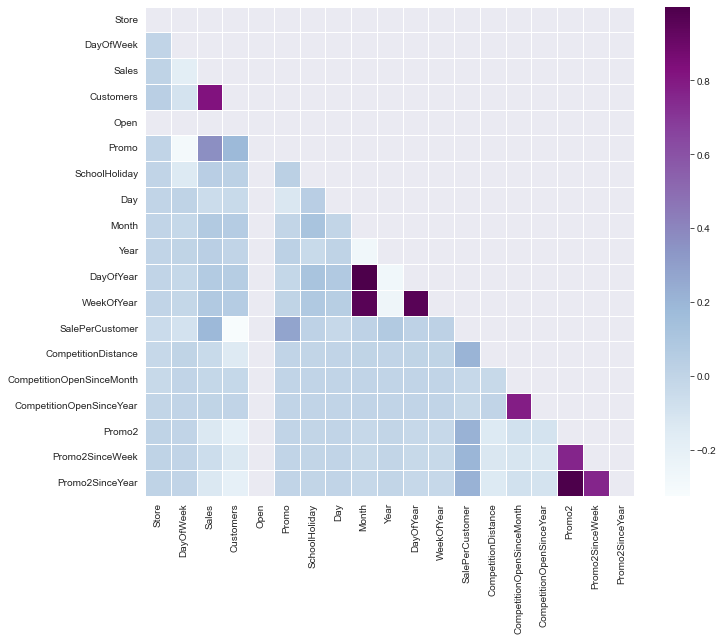

In [96]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = train.drop('Open', axis = 1).corr()
corr_all = train.drop('Unnamed: 0', axis = 1).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

## Seasonality

In [22]:
time_data = train[['Date', 'Sales']]
time_data['datetime'] = pd.to_datetime(time_data['Date'])
time_data = time_data.set_index('datetime')
time_data = time_data.drop(['Date'], axis = 1)

C:\Users\daisy.khaabi\AppData\Local\Temp\ipykernel_16288\1384706147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['datetime'] = pd.to_datetime(time_data['Date'])


In [23]:
time_data

,Sales
datetime,
2013-01-02,5530
2013-01-03,4327
2013-01-04,4486
2013-01-05,4997
2013-01-07,7176
...,...
2015-07-27,10712
2015-07-28,8093
2015-07-29,7661


<AxesSubplot: title={'center': 'Seasonality plot averaged daily'}, xlabel='datetime'>

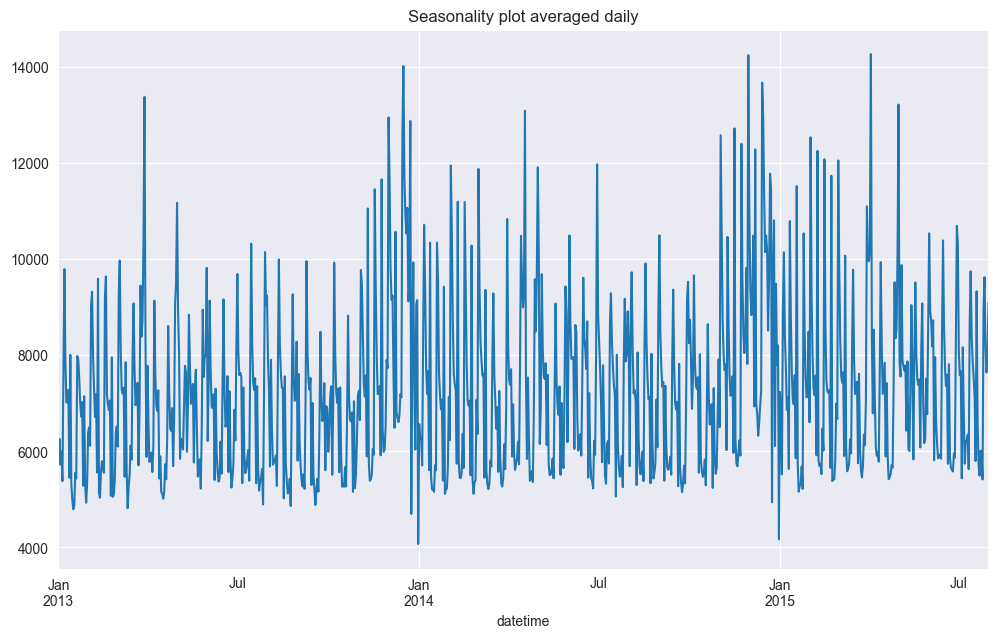

In [24]:
daily_time_data = time_data.Sales.resample('D').mean()
fig = plt.figure(figsize = (12,7))
plt.title('Seasonality plot averaged daily')
daily_time_data.plot()

<AxesSubplot: title={'center': 'Seasonality plot averaged weekly'}, xlabel='datetime', ylabel='average sales'>

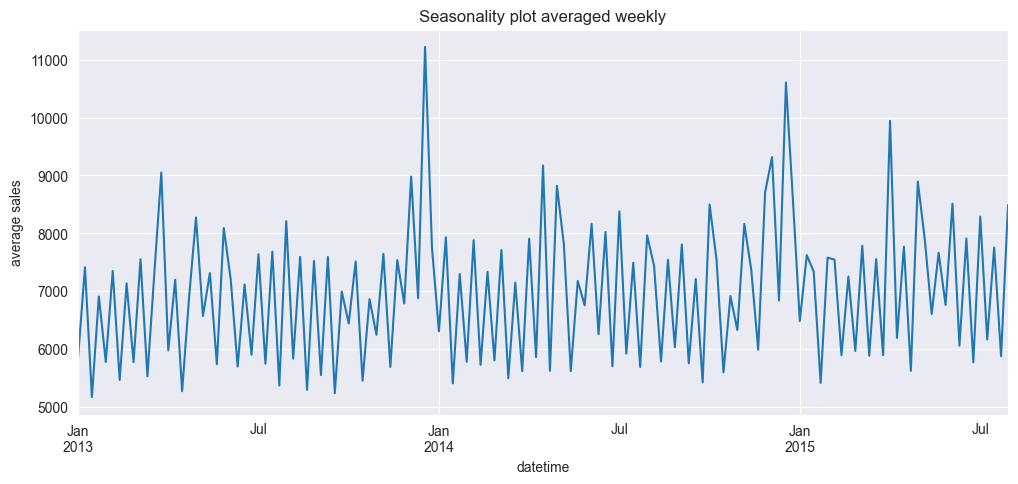

In [25]:
weekly_time_data = time_data.Sales.resample('W').mean()
fig = plt.figure(figsize = (12,5))
plt.title('Seasonality plot averaged weekly')
plt.ylabel('average sales')
weekly_time_data.plot()

<AxesSubplot: title={'center': 'Seasonality plot averaged monthly'}, xlabel='datetime', ylabel='average sales'>

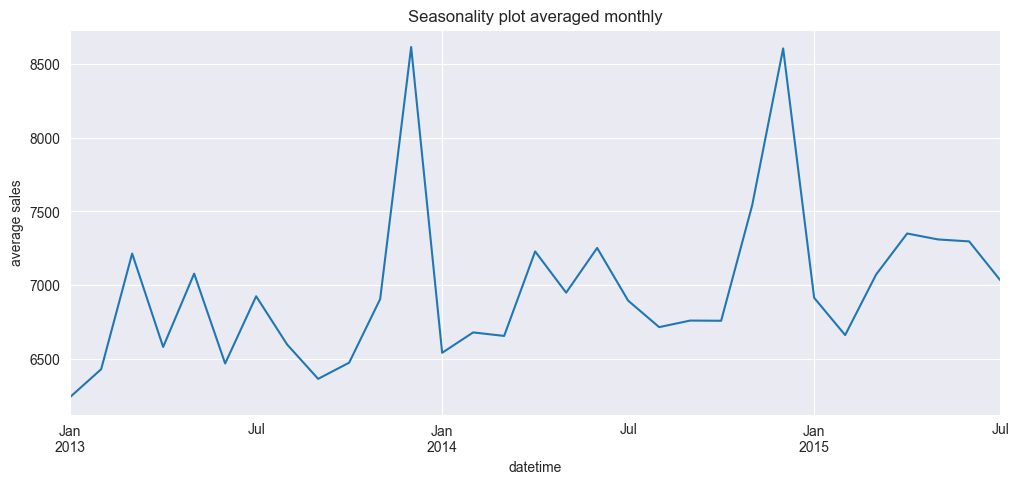

In [26]:
monthly_time_data = time_data.Sales.resample('M').mean()
fig = plt.figure(figsize = (12,5))
plt.title('Seasonality plot averaged monthly')
plt.ylabel('average sales')
monthly_time_data.plot()

<AxesSubplot: title={'center': 'Seasonality plot monthly percentages change'}, xlabel='datetime', ylabel='sales percentage change'>

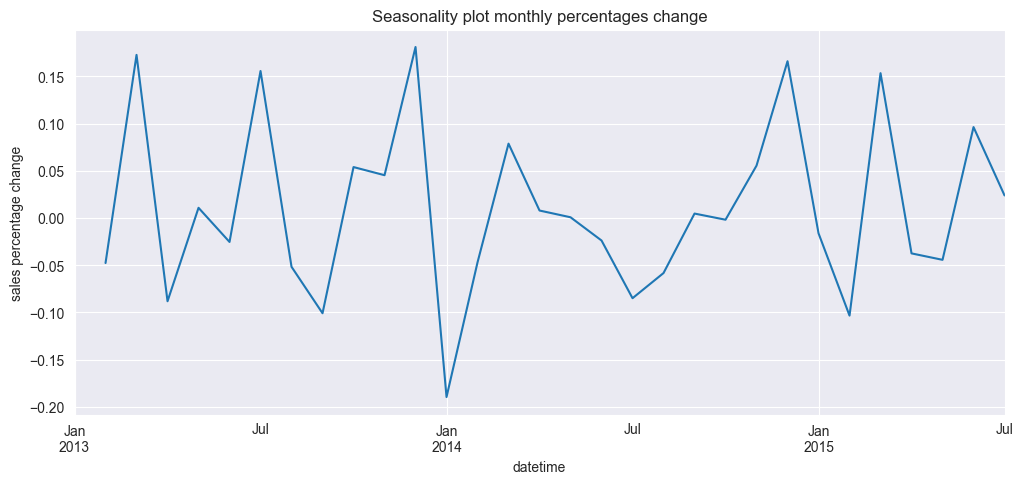

In [27]:
monthly_time_data = time_data.Sales.resample('M').sum().pct_change()
fig = plt.figure(figsize = (12,5))
plt.title('Seasonality plot monthly percentages change')
plt.ylabel('sales percentage change')
monthly_time_data.plot()

<AxesSubplot: title={'center': 'Seasonality plot averaged yearly'}, xlabel='datetime', ylabel='average sales'>

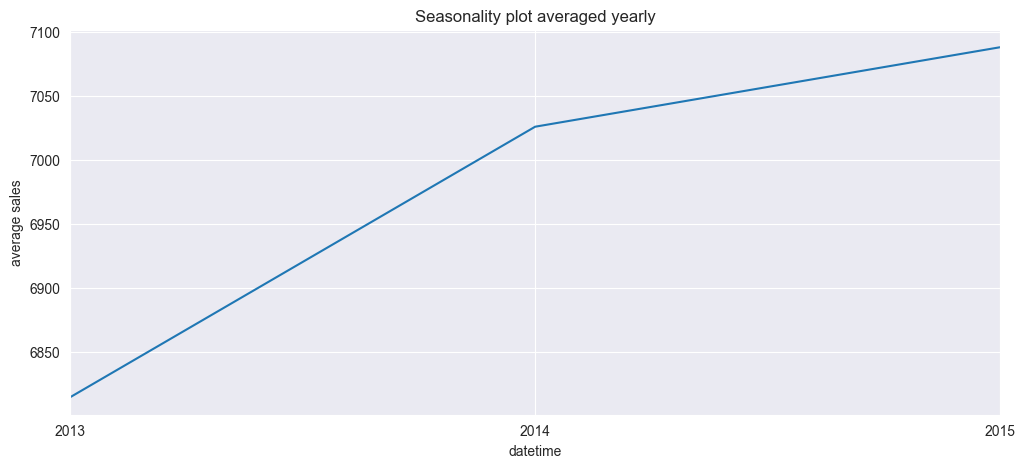

In [28]:
yearly_time_data = time_data.Sales.resample('Y').mean()
fig = plt.figure(figsize = (12,5))
plt.title('Seasonality plot averaged yearly')
plt.ylabel('average sales')
yearly_time_data.plot()

Seasonality plots averaged weekly and monthly


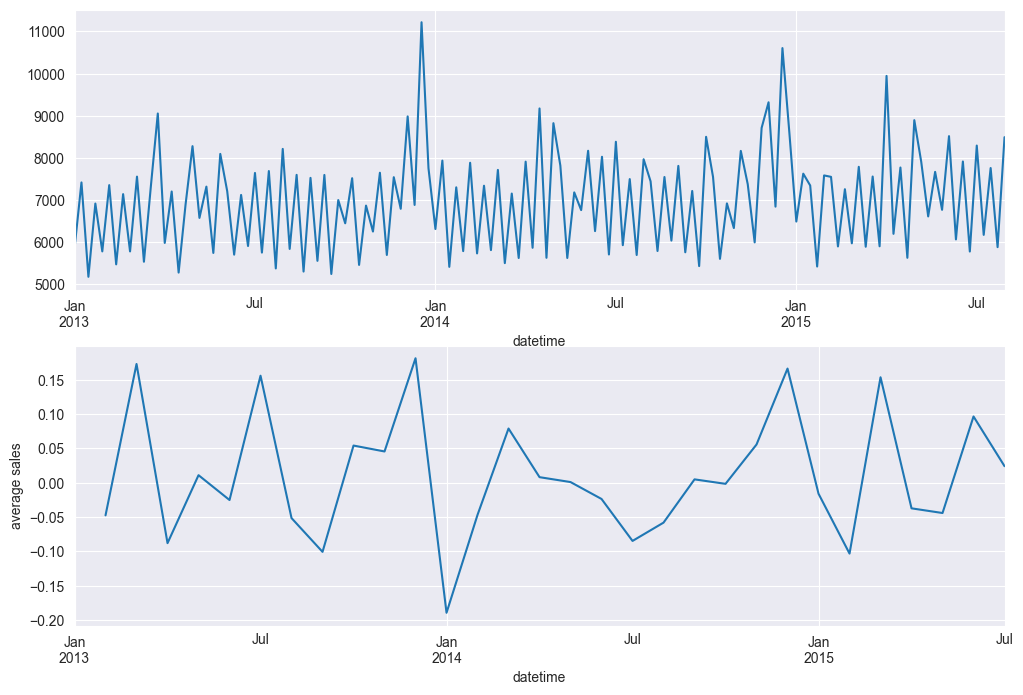

In [29]:
f, axs = plt.subplots(2,figsize=(12,8))
plt.ylabel('average sales')
# daily_time_data.plot(ax = axs[0])
weekly_time_data.plot(ax=axs[0])
monthly_time_data.plot(ax=axs[1])
print('Seasonality plots averaged weekly and monthly')

## SALES

C:\Users\daisy.khaabi\AppData\Local\Temp\ipykernel_16288\3964826997.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Sales'], bins = 20, color = 'Magenta')


[Text(0.5, 1.0, 'sales distribution')]

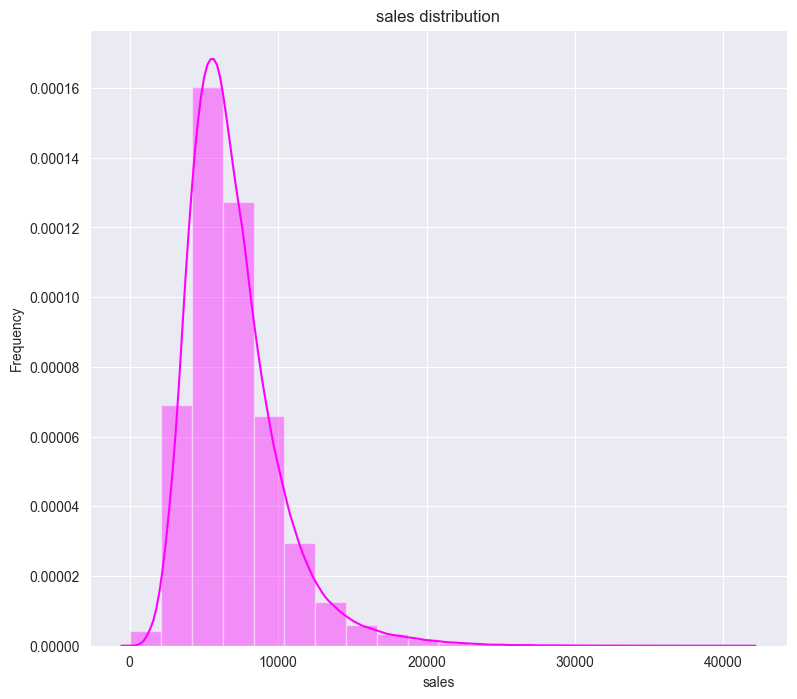

In [31]:
f, ax = plt.subplots(figsize=(9, 8))
sns.distplot(train['Sales'], bins = 20, color = 'Magenta')
ax.set(ylabel="Frequency")
ax.set(xlabel="sales")
ax.set(title="sales distribution")

top 6 features with highest correlation with sales


C:\Users\daisy.khaabi\AppData\Local\Temp\ipykernel_16288\4205404670.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  f_most_correlated = f_data.corr().nlargest(f_number


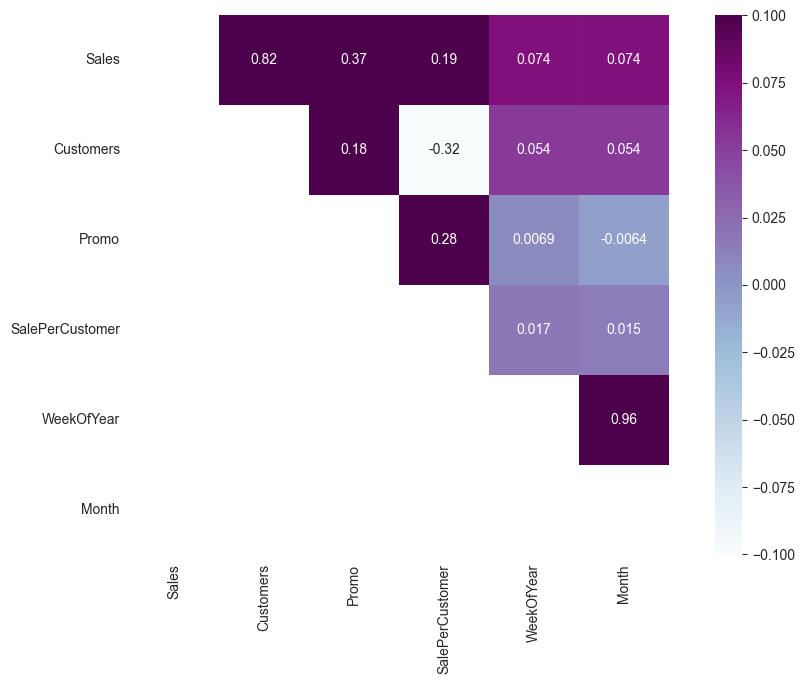

In [33]:
def correlation_map(f_data, f_feature, f_number):
    f_most_correlated = f_data.corr().nlargest(f_number
                                               , f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()

    f_mask = np.zeros_like(f_correlation)
    f_mask[np.tril_indices_from(f_mask)] = True
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(12,7))
        f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=0, square=True, annot=True, annot_kws={"size": 10}, cmap="BuPu")

    plt.show()

print('top 6 features with highest correlation with sales')
correlation_map(train, 'Sales', 6)